<a href="https://colab.research.google.com/github/aSafarpoor/Traffic-Sign-Detection-DIPFinalProject-/blob/main/dip_project_phase0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [252]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import cv2
from google.colab.patches import cv2_imshow
import os
from tqdm import tqdm
import subprocess
import random

from skimage.feature import hog
from skimage import exposure

In [253]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [254]:
%cd drive/MyDrive/"DIP project"

[Errno 2] No such file or directory: 'drive/MyDrive/DIP project'
/content/drive/My Drive/DIP project/DATA


In [255]:
%cd DATA

[Errno 2] No such file or directory: 'DATA'
/content/drive/My Drive/DIP project/DATA


In [256]:
!ls

0  1  10  2  3	4  5  6  7  8  9


In [257]:
namelist = []
labellist = []
classes=range(0,11)
for i in tqdm(classes):
    os.chdir(str(i))
    output = subprocess.check_output(["ls"]).decode()
    
    templist = output.split('\n')
    for j in templist:
        namelist.append(str(i)+'/'+str(j))
        labellist.append(i)
    %cd ..

  0%|          | 0/11 [00:00<?, ?it/s]

/content/drive/My Drive/DIP project/DATA
/content/drive/My Drive/DIP project/DATA


 55%|█████▍    | 6/11 [00:00<00:00, 52.40it/s]

/content/drive/My Drive/DIP project/DATA
/content/drive/My Drive/DIP project/DATA
/content/drive/My Drive/DIP project/DATA
/content/drive/My Drive/DIP project/DATA
/content/drive/My Drive/DIP project/DATA
/content/drive/My Drive/DIP project/DATA
/content/drive/My Drive/DIP project/DATA


100%|██████████| 11/11 [00:00<00:00, 52.10it/s]

/content/drive/My Drive/DIP project/DATA
/content/drive/My Drive/DIP project/DATA


In [258]:
len(namelist),len(labellist)

(962, 962)

In [259]:
ims = []
labels = []

for c in tqdm(range(len(namelist))):
    name = namelist[c]
    im = cv2.imread(name)
    try:
        len(im)<1
        ims.append(im)
        labels.append(labellist[c])
        # print(name,labellist[c])
    except:
        pass
    

100%|██████████| 962/962 [00:02<00:00, 424.07it/s]


In [260]:
ims = np.array(ims)
len(ims),len(labels),ims.shape

(951, 951, (951, 32, 32, 3))

##HSV

In [261]:
!pip install Image

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [262]:
import colorsys

def HSVColor(img):
    shapee = img.shape
    temp = img.reshape(-1,3)
    # print(temp.shape,temp[0])
    temp2 = [colorsys.rgb_to_hsv(im[0],im[1],im[2]) for im in temp]
    img = np.array(temp2).reshape(shapee)
    img[:,:,2]/=255
    return img

In [263]:
HSVColor(np.array([[[100,200,120]]]))

array([[[0.36666667, 0.5       , 0.78431373]]])

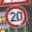

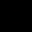

In [264]:
im = np.copy(ims[0])
cv2_imshow(im)
im = HSVColor(im)
cv2_imshow(im)

* SIGNAL BASED
* COLOR BASED
* EDGE BASED

# SIGNAL BASED

In [265]:
from scipy.fft import fft, fftfreq, fft2, ifft2

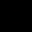

/usr/local/lib/python3.7/dist-packages/google/colab/patches/__init__.py:22: ComplexWarning: Casting complex values to real discards the imaginary part
  a = a.clip(0, 255).astype('uint8')


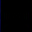

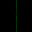

In [266]:
# im = np.copy(ims[0])
fft_img = np.fft.fft2(im)
fft_img_shift = np.fft.fftshift(fft_img)
cv2_imshow(im)
cv2_imshow(fft_img)
cv2_imshow(fft_img_shift)

In [267]:
sample = np.copy(fft_img_shift)

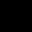

/usr/local/lib/python3.7/dist-packages/google/colab/patches/__init__.py:22: ComplexWarning: Casting complex values to real discards the imaginary part
  a = a.clip(0, 255).astype('uint8')


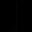

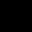

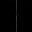

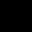

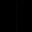

In [268]:
s0 = sample[:,:,0]
s1 = sample[:,:,1]
s2 = sample[:,:,2]

cv2_imshow(im[:,:,0])
cv2_imshow(s0)
cv2_imshow(im[:,:,1])
cv2_imshow(s1)
cv2_imshow(im[:,:,2])
cv2_imshow(s2)

In [269]:
def distance(a,b):
    return round(((a[0]-b[0])**2+(a[1]-b[1])**2)**0.5,2)

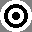

In [270]:
def func(sample):
    sample = np.copy(sample)
    s0 = sample[:,:,0]
    d1,d2 = s0.shape
    m1,m2 = (d1-1)/2,(d2-1)/2
    # print(distance([0,0],[m1,m2]))
    ths = [4,8,12,16]
    lavels_point = np.zeros((d1,d2))
    for i in range(d1):
        for j in range(d2):
            d = distance([i,j],[m1,m1])
            if d<ths[0]:
                lavels_point[i][j] = 0
            elif d<ths[1]:
                lavels_point[i][j] = 255
            elif d<ths[2]:
                lavels_point[i][j] = 0
            elif d<ths[3]:
                lavels_point[i][j] = 255
            else:
                lavels_point[i][j] = 128
    
    cv2_imshow(lavels_point)

func(sample)

In [271]:
def func(sample):
    sample = np.copy(sample)
    s0 = sample[:,:,0]
    s1 = sample[:,:,1]
    s2 = sample[:,:,2]
    d1,d2 = s1.shape
    m1,m2 = (d1-1)/2,(d2-1)/2
    # print(distance([0,0],[m1,m2]))
    ths = [4,8,12,16]
    lavels_point = [[],[],[],[],[]]
    sample = s1
    for i in range(d1):
        for j in range(d2):
            d = distance([i,j],[m1,m1])
            if d<ths[0]:
                lavels_point[0].append(sample[i][j])
            elif d<ths[1]:
                lavels_point[1].append(sample[i][j])
            elif d<ths[2]:
                lavels_point[2].append(sample[i][j])
            elif d<ths[3]:
                lavels_point[3].append(sample[i][j])
            else:
                lavels_point[4].append(sample[i][j])
    lavels_point = np.array(lavels_point)
    return lavels_point

lavels_point = func(sample)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:25: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.


In [272]:
def fft_feature_extractior(im):
    flist = []

    fft_img = np.fft.fft2(im)
    sample = np.fft.fftshift(fft_img)
    
    s0 = sample[:,:,0]
    s1 = sample[:,:,1]
    s2 = sample[:,:,2]

    lp0 = func(s0)
    lp1 = func(s1)
    lp2 = func(s2)

    def convertor_23(lp,flist):
        out = [np.mean(lp[0]),np.mean(lp[1]),np.mean(lp[2]),np.mean(lp[3]),np.mean(lp[4])]
        absout = list(map(abs,out))
        for i in range(len(out)):
            flist.append(absout[i])
            flist.apppend(np.angle(out[i]))
        return flist 
    
    flist = convertor_23(lp0,flist)
    flist = convertor_23(lp1,flist)
    flist = convertor_23(lp2,flist)

    return flist

In [273]:
out = [np.mean(lavels_point[0]),np.mean(lavels_point[1]),np.mean(lavels_point[2]),np.mean(lavels_point[3]),np.mean(lavels_point[4])]
absout = list(map(abs,out))
for i in range(len(out)):
    print(out[i],'\n   ---------------------------------------> ',absout[i])
    print(out[i],'\n   ------------------------------------------------------------------> ',np.angle(out[i]))

(7.774752313757279+0.16514489143384967j) 
   --------------------------------------->  7.776506051913087
(7.774752313757279+0.16514489143384967j) 
   ------------------------------------------------------------------>  0.021237983460091654
(2.1719042044494175-0.005064531553517051j) 
   --------------------------------------->  2.1719101092782163
(2.1719042044494175-0.005064531553517051j) 
   ------------------------------------------------------------------>  -0.0023318350614872233
(1.425993934477561+0.015578920236822034j) 
   --------------------------------------->  1.4260790314433978
(1.425993934477561+0.015578920236822034j) 
   ------------------------------------------------------------------>  0.010924520854555317
(1.2149541007675726-0.0196857619735329j) 
   --------------------------------------->  1.2151135733734602
(1.2149541007675726-0.0196857619735329j) 
   ------------------------------------------------------------------>  -0.016201467617961107
(0.3748453384092841-0.020616

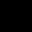

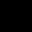

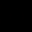

In [274]:
r = im[:,:,0]
g = im[:,:,1]
b = im[:,:,2]
z = np.zeros(b.shape)
cv2_imshow(np.array([r,z,z]).transpose())
cv2_imshow(np.array([z,g,z]).transpose())
cv2_imshow(np.array([z,z,b]).transpose())

In [275]:
im.shape

(32, 32, 3)

In [276]:
class feature_extraction():
    def __init__(self):
        pass
    
    @staticmethod
    def binary(img,th=0.5):
        img2 = np.copy(img)
        img2[img2>th]=1
        img2[img2<1]=0
        return img2
    
    @staticmethod
    def area(img):
        img2 = np.copy(img)
        img2 = feature_extraction.binary(img)
        return int(img2.sum())

    @staticmethod
    def char_dar_char(img):
        img2 = np.copy(img)
        out = []
        for i in range(4):
            for j in range(4):
                subim = img2[i*8:i*8+7,j*8:j*8+7]
                out.append(round(subim.sum()/64,2))
        return out
    
    @staticmethod
    def do_dar_do(img):
        img2 = np.copy(img)
        out = []
        for i in range(2):
            for j in range(2):
                subim = img2[i*16:i*16+15,j*16:j*16+15]
                out.append(round(subim.sum()/256,2))
        return out
    
    @staticmethod
    def char_axis1(img):
        img2 = np.copy(img)
        out = []
        for i in range(4):
                subim = img2[i*8:i*8+7,:]
                out.append(round(subim.sum()/256,2))
        return out
    
    @staticmethod
    def char_axis2(img):
        img2 = np.copy(img)
        out = []
        for i in range(4):
                subim = img2[:,i*8:i*8+7]
                out.append(round(subim.sum()/256,2))
        return out
    
    @staticmethod
    def vertical_edge(img):
        kernel = np.array([[1,0],[1,0]])
        afterkernel = cv2.filter2D(img,-1,kernel)
        return round(afterkernel.sum()/(1024),2)
    
    @staticmethod
    def horisental_edge(img):
        kernel1 = np.array([[1,1],[0,0]])
        kernel2 = np.array([[0,0],[1,1]])

        afterkernel1 = cv2.filter2D(img,-1,kernel1)
        afterkernel2 = cv2.filter2D(img,-1,kernel2)
        return round((afterkernel1.sum()+afterkernel2.sum())/(1024*2),2)

    @staticmethod
    def kaj_chap_edge(img):
        kernel1 = np.array([[1,1],[1,0]])
        kernel2 = np.array([[0,1],[1,1]])

        afterkernel1 = cv2.filter2D(img,-1,kernel1)
        afterkernel2 = cv2.filter2D(img,-1,kernel2)
        return round(afterkernel1.sum()/1024,2),round(afterkernel2.sum()/1024,2)

    @staticmethod
    def kaj_rast_edge(img):
        kernel1 = np.array([[1,0],[1,1]])
        kernel2 = np.array([[1,1],[0,1]])

        afterkernel1 = cv2.filter2D(img,-1,kernel1)
        afterkernel2 = cv2.filter2D(img,-1,kernel2)
        return round(afterkernel1.sum()/1024,2),round(afterkernel2.sum()/1024,2)

    @staticmethod
    def run(img,th='0.5'):
        
        f = []
        f.append(feature_extraction.area(img)/1024)
        for i in feature_extraction.char_dar_char(img):
            f.append(i)
        for i in feature_extraction.do_dar_do(img):
            f.append(i)
        for i in feature_extraction.char_axis1(img):
            f.append(i)
        for i in feature_extraction.char_axis2(img):
            f.append(i)
        f.append(feature_extraction.vertical_edge(img))
        f.append(feature_extraction.horisental_edge(img))
        for i in feature_extraction.kaj_chap_edge(img):
            f.append(i)
        for i in feature_extraction.kaj_rast_edge(img):
            f.append(i)

        return np.array(f)

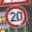

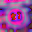

In [277]:
im = np.copy(ims[0])
cv2_imshow(im)
im = HSVColor(im)
cv2_imshow(im*255)

In [278]:
im[:,:,2].max(),im[:,:,2].min()

(1.0, 0.21176470588235294)

In [279]:
feature_extraction.run(im[:,:,1])

array([0.10253906, 0.35      , 0.28      , 0.32      , 0.28      ,
       0.14      , 0.2       , 0.17      , 0.24      , 0.3       ,
       0.15      , 0.09      , 0.26      , 0.13      , 0.22      ,
       0.17      , 0.11      , 0.29      , 0.29      , 0.23      ,
       0.18      , 0.34      , 0.22      , 0.23      , 0.18      ,
       0.26      , 0.25      , 0.21      , 0.25      , 0.56      ,
       0.56      , 0.84      , 0.84      , 0.84      , 0.84      ])

In [280]:
# mohem

%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%

final round till now

%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%

In [281]:
def fft_feature_extractior_helper(sample):
    sample = np.copy(sample)
    
    d1,d2 = sample.shape
    m1,m2 = (d1-1)/2,(d2-1)/2
    # print(distance([0,0],[m1,m2]))
    ths = [4,8,12,16]
    lavels_point = [[],[],[],[],[]]
    
    for i in range(d1):
        for j in range(d2):
            d = distance([i,j],[m1,m1])
            if d<ths[0]:
                lavels_point[0].append(sample[i][j])
            elif d<ths[1]:
                lavels_point[1].append(sample[i][j])
            elif d<ths[2]:
                lavels_point[2].append(sample[i][j])
            elif d<ths[3]:
                lavels_point[3].append(sample[i][j])
            else:
                lavels_point[4].append(sample[i][j])
    lavels_point = np.array(lavels_point)
    return lavels_point


In [282]:
def fft_feature_extractior(im):
    flist = []

    s0 = im[:,:,0]
    s1 = im[:,:,1]
    s2 = im[:,:,2]

    fft_img = np.fft.fft2(s0)
    s0 = np.fft.fftshift(fft_img)

    fft_img = np.fft.fft2(s1)
    s1 = np.fft.fftshift(fft_img)

    fft_img = np.fft.fft2(s2)
    s2 = np.fft.fftshift(fft_img)
    
    lp0 = fft_feature_extractior_helper(s0)
    lp1 = fft_feature_extractior_helper(s1)
    lp2 = fft_feature_extractior_helper(s2)

    def convertor_23(lp,flist):
        out = [np.mean(lp[0]),np.mean(lp[1]),np.mean(lp[2]),np.mean(lp[3]),np.mean(lp[4])]
        absout = list(map(abs,out))
        for i in range(len(out)):
            flist.append(absout[i])
            # flist.append(np.angle(out[i]))
        return flist 
    
    flist = convertor_23(lp0,flist)
    flist = convertor_23(lp1,flist)
    flist = convertor_23(lp2,flist)

    max_ = max(flist)
    for i in range(0,len(flist),2):
        flist[i]/=max_

    return flist


In [283]:
class feature_extraction():
    def __init__(self):
        pass
    
    @staticmethod
    def binary(img,th=0.5):
        img2 = np.copy(img)
        img2[img2>th]=1
        img2[img2<1]=0
        return img2
    
    @staticmethod
    def area(img):
        img2 = np.copy(img)
        img2 = feature_extraction.binary(img)
        return int(img2.sum())

    @staticmethod
    def char_dar_char(img):
        img2 = np.copy(img)
        out = []
        for i in range(4):
            for j in range(4):
                subim = img2[i*8:i*8+7,j*8:j*8+7]
                out.append(round(subim.sum()/64,2))
        return out
    
    @staticmethod
    def do_dar_do(img):
        img2 = np.copy(img)
        out = []
        for i in range(2):
            for j in range(2):
                subim = img2[i*16:i*16+15,j*16:j*16+15]
                out.append(round(subim.sum()/256,2))
        return out
    
    @staticmethod
    def char_axis1(img):
        img2 = np.copy(img)
        out = []
        for i in range(4):
                subim = img2[i*8:i*8+7,:]
                out.append(round(subim.sum()/256,2))
        return out
    
    @staticmethod
    def char_axis2(img):
        img2 = np.copy(img)
        out = []
        for i in range(4):
                subim = img2[:,i*8:i*8+7]
                out.append(round(subim.sum()/256,2))
        return out
    
    @staticmethod
    def vertical_edge(img):
        kernel = np.array([[1,0],[1,0]])
        afterkernel = cv2.filter2D(img,-1,kernel)
        return round(afterkernel.sum()/(1024),2)
    
    @staticmethod
    def horisental_edge(img):
        kernel1 = np.array([[1,1],[0,0]])
        kernel2 = np.array([[0,0],[1,1]])

        afterkernel1 = cv2.filter2D(img,-1,kernel1)
        afterkernel2 = cv2.filter2D(img,-1,kernel2)
        return round((afterkernel1.sum()+afterkernel2.sum())/(1024*2),2)

    @staticmethod
    def kaj_chap_edge(img):
        kernel1 = np.array([[1,1],[1,0]])
        kernel2 = np.array([[0,1],[1,1]])

        afterkernel1 = cv2.filter2D(img,-1,kernel1)
        afterkernel2 = cv2.filter2D(img,-1,kernel2)
        return round(afterkernel1.sum()/1024,2),round(afterkernel2.sum()/1024,2)

    @staticmethod
    def kaj_rast_edge(img):
        kernel1 = np.array([[1,0],[1,1]])
        kernel2 = np.array([[1,1],[0,1]])

        afterkernel1 = cv2.filter2D(img,-1,kernel1)
        afterkernel2 = cv2.filter2D(img,-1,kernel2)
        return round(afterkernel1.sum()/1024,2),round(afterkernel2.sum()/1024,2)

    @staticmethod
    def run_(img,th='0.5'):
        f = []
        f.append(feature_extraction.area(img)/1024)
        for i in feature_extraction.char_dar_char(img):
            f.append(i)
        for i in feature_extraction.do_dar_do(img):
            f.append(i)
        for i in feature_extraction.char_axis1(img):
            f.append(i)
        for i in feature_extraction.char_axis2(img):
            f.append(i)
        f.append(feature_extraction.vertical_edge(img))
        f.append(feature_extraction.horisental_edge(img))
        for i in feature_extraction.kaj_chap_edge(img):
            f.append(i)
        for i in feature_extraction.kaj_rast_edge(img):
            f.append(i)

        return np.array(f)
    
    @staticmethod
    def run(img,th=0.5):
        if len(img.shape)==3:
            f = np.array([])
            s0 =  img[:,:,0]
            s1 =  img[:,:,1]
            s2 =  img[:,:,2]
            f = np.concatenate([f,feature_extraction.run_(s0,th='0.5')])
            f = np.concatenate([f,feature_extraction.run_(s1,th='0.5')])
            f = np.concatenate([f,feature_extraction.run_(s2,th='0.5')])
            return f
        else:
            f = np.array([])
            s0 =  img[:,:]
            f = np.concatenate([f,feature_extraction.run_(s0,th='0.5')])
            return f

In [284]:
import colorsys

def HSVColor(img):
    shapee = img.shape
    temp = img.reshape(-1,3)
    # print(temp.shape,temp[0])
    temp2 = [colorsys.rgb_to_hsv(im[0],im[1],im[2]) for im in temp]
    img = np.array(temp2).reshape(shapee)
    img[:,:,2]/=255
    return img

In [285]:
flist = []
for i in tqdm(ims):
    im = np.copy(i)

    fd, hog_image = hog(im, orientations=9, pixels_per_cell=(8, 8),
                	cells_per_block=(2, 2), visualize=True, multichannel=True)
    im = im/256

    # hsvim = HSVColor(im)

    # f1 = fft_feature_extractior(im)
    # f2 = feature_extraction.run(im)
    f3 = feature_extraction.run(hog_image)

    # f4 = fft_feature_extractior(hsvim)
    # f5 = feature_extraction.run(hsvim)
    f = np.concatenate([f3])
    flist.append(np.copy(f))

100%|██████████| 951/951 [00:03<00:00, 264.99it/s]


#knn

In [286]:
len(flist[0])

35

In [287]:
len(flist),len(labels)

(951, 951)

In [288]:
# lllllll = np.copy(labels)

In [301]:
ims2 = np.copy(flist)
# ims2 = np.copy(ims)
c = list(zip(ims2, labels))
random.shuffle(c)
ims2, labels = zip(*c)

In [302]:
# cv2_imshow(ims2[0])
# print(labels[0])
# cv2_imshow(ims2[100])
# print(labels[100])
# cv2_imshow(ims2[-1])
# print(labels[-1])

In [303]:
ims2 = np.array(ims2)

In [304]:
# ims2 = ims2.reshape((-1,32*32*3))


In [306]:
# Import necessary modules
import random
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris
 
flist = ims2 #**********

X_train, X_test, y_train, y_test = train_test_split(
             flist, labels, test_size = 0.2, random_state=42)
 
knn = KNeighborsClassifier(n_neighbors=1)
 
knn.fit(X_train, y_train)
 
# Calculate the accuracy of the model
print(knn.score(X_test, y_test))

0.93717277486911
